とうけい

5.1 データの特徴を表す

In [1]:
import random
num_friends = [random.choice(range(101)) for _ in range(204)]

In [2]:
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

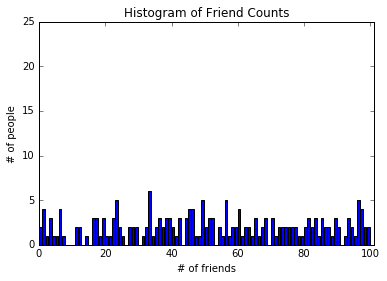

In [3]:
friend_counts = Counter(num_friends)
xs = [i for i in range(100)]
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [4]:
num_points = len(num_friends) #データの数
largest_value = max(num_friends) #最大値
smallest_value = min(num_friends) #最小値

In [5]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] #最小値
second_smallest_value = sorted_values[1] #2番目に小さい値
second_largest_value = sorted_values[-2] #2番目に大きい値

5.1.1 代表値

In [6]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends) #平均値

52.38235294117647

In [7]:
def median(v):
    """vの中央値を返す"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        #奇数個の場合は中央の要素を返す
        return sorted_v[midpoint]
    else:
        #偶数個の場合は中央の要素の平均を返す
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) /2

In [8]:
median(num_friends)

51.0

In [9]:
def quantile(x, p):
    """x中のp百分位数を返す"""
    p_index = int(p*len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.5)

51

In [10]:
def mode(x):
    """モード（最頻値）は1つとは限らないのでリストを返す"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [11]:
mode(num_friends)

[33]

5.1.2 散らばり

In [12]:
def data_range(x):
    return max(x) - min(x)

In [13]:
data_range(num_friends)

100

In [14]:
def de_mean(x):
    """xを変換して、xとxの平均との差とする"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [15]:
def dot(v, w):
    """v_1*w_1 +...+v_n*w_n"""
    return sum(v_i*w_i for v_i, w_i in zip(v,w))
def sum_of_squares(v):
    """v_1*v_1+...+v_n*v_n"""
    return dot(v, v)

In [16]:
def variance(x):
    """xには少なくとも2つの値があることを前提とする"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

In [17]:
variance(num_friends)

831.7939727615186

In [18]:
import math
def standard_deviation(x): #標準偏差
    return math.sqrt(variance(x))

In [19]:
standard_deviation(num_friends)

28.84083862791647

In [20]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [21]:
interquartile_range(num_friends)

46

5.2 相関

In [22]:
daily_minutes = [random.choice(range(60)) for _ in range(204)]

In [23]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

In [24]:
covariance(num_friends, daily_minutes)

39.69979716024341

In [25]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)/stdev_x/stdev_y
    else:
        return 0

In [26]:
correlation(num_friends, daily_minutes)

0.0803076848692023

相関係数は外れ値に敏感だから取り除いた方がよくてうんぬん

5.3 シンプソンのパラドックス  
  
ある状況の違いを無視して得た相関係数は、誤った結果を導く可能性がある  

In [27]:
import pandas as pd

In [28]:
data = [["西海岸", 101, 8.2], ["東海岸", 103, 6.5]]
df = pd.DataFrame(data)
df.columns='グループ','ユーザ数','知り合い数平均'
df

,グループ,ユーザ数,知り合い数平均
0,西海岸,101,8.2
1,東海岸,103,6.5


これだけ見ると西マンの方が友好的っぽい  
が、博士号も考慮すると違う感じに

In [29]:
data2 = [["西海岸","PhDあり", 35, 3.1],
        ["東海岸", "PhDあり", 70, 3.2],
       ["西海岸", "PhDなし", 66, 10.9],
       ["東海岸", "PhDなし", 33, 13.4]]
df2 = pd.DataFrame(data2)
df2.columns='グループ','学位','ユーザ数','知り合い数平均'
df2

,グループ,学位,ユーザ数,知り合い数平均
0,西海岸,PhDあり,35,3.1
1,東海岸,PhDあり,70,3.2
2,西海岸,PhDなし,66,10.9
3,東海岸,PhDなし,33,13.4


こう見ると東の方が友好的っぽいですねえというお話